# Clustering K-means Assignment

### Team Name - Machine Learners
### Team Members - Aryan Jadon and Swathi Anandram


### Dataset Used - Kaggle Link (https://www.kaggle.com/c/kaggle-pog-series-s01e01/data)

#### More About Data - 
Training/Test Data (train.parquet/test.parquet)

1. id - Unique Identifier for the row (combindation of video id and trending date)
2. video_id - Unique Identifier for the video
3. title - Title of the Video
4. publishedAt - Datetime the video was published
5. channelId - Id of the channel hosting the video
6. channelTitle - Title of the channel hosting the video
7. categoryId - Video category
8. trending_date - Date on which we are predicting the view count
9. tags - Video Tags
10. view_count - Number of views as of the trending date
11. likes - Number of likes as of the trending date Not provided in the test set
12. dislikes - Number of dislikes Not provided in the test set
13. comment_count Comment Count Not provided in the test set
14. thumbnail_link Link to the thumbnail of the video.
15. comments_disabled True/False if comments are disabled.
16. ratings_disabled True/False if ratings are disabled.
17. duration_seconds The duration of the video.
18. has_thumbnail True/False if the thumbnail is available for the video.
19. description Video description
20. target TARGET COLUMN - this is the ratio of like to view count.


## Objectives

### 1. What business problem can be solved using the data?
### Ans- We are first analyzing what kind of videos [ funny animal videos, backyard experiments, music , challenges etc ] are getting popular on the video streaming websites. This will give an insight to the users mindset on what kind of content they are liking currently. Using these insights, Advertisment Companies can plan, develop and target their advertisment videos to the users more accurately.




### Dataset Preparation and Analysis

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [32]:
videos_dataframe = pd.read_parquet('https://raw.githubusercontent.com/aryan-jadon/Dataset-ML-Spring-2022/main/train.parquet')

In [33]:
videos_dataframe.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


In [34]:
videos_dataframe.describe()

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,target
count,92275.000000,9.227500e+04,9.227500e+04,92275.000000,9.227500e+04,90099.000000,92275.000000
mean,18.733416,2.779091e+06,1.521223e+05,3110.977307,1.373574e+04,760.614602,0.057060
std,6.866404,7.364113e+06,4.374777e+05,13342.743386,9.672682e+04,5816.818926,0.040373
min,1.000000,3.851000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,0.000000
25%,17.000000,5.312440e+05,2.136300e+04,368.000000,1.692000e+03,184.000000,0.028066
50%,20.000000,1.100045e+06,5.169200e+04,852.000000,3.856000e+03,446.000000,0.050784
75%,24.000000,2.482274e+06,1.312825e+05,2239.000000,9.322000e+03,854.000000,0.075265
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,485620.000000,0.433503


### Videos Category

In [35]:
all_categories = {
  "1":"Film & Animation",
  "2":"Autos & Vehicles",
  "10":"Music",
  "15":"Pets & Animals",
  "17":"Sports",
  "18":"Short Movies",
  "19":"Travel & Events",
  "20":"Gaming",
  "21":"Videoblogging",
  "22":"People & Blogs",
  "23":"Comedy",
  "24":"Entertainment",
  "25":"News & Politics",
  "26":"How to & Style",
  "27":"Education",
  "28":"Science & Technology",
  "29":"Nonprofits & Activism",
  "30":"Movies",
  "31":"Anime/Animation",
  "32":"Action/Adventure",
  "33":"Classics",
  "34":"Comedy",
  "35":"Documentary",
  "36":"Drama",
  "37":"Family",
  "38":"Foreign",
  "39":"Horror",
  "40":"Sci-Fi/Fantasy",
  "41":"Thriller",
  "42":"Shorts",
  "43":"Shows",
  "44":"Trailers"
  }

In [36]:
videos_dataframe["cateogory_name"] = ""

In [37]:
for index, row in tqdm(videos_dataframe.iterrows(), total=videos_dataframe.shape[0]):
    cat_id = row['categoryId']
    cat_name = all_categories[str(cat_id)]
    videos_dataframe.at[index,'cateogory_name'] = cat_name


100%|██████████| 92275/92275 [00:17<00:00, 5299.48it/s]


In [38]:
videos_dataframe.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,cateogory_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611,Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753,How to & Style


In [39]:
for index, row in tqdm(videos_dataframe.iterrows(), total=videos_dataframe.shape[0]):
    tags = row['tags']
    videos_dataframe.at[index,'tags'] = ",".join(tags.split('|'))

100%|██████████| 92275/92275 [00:17<00:00, 5158.23it/s]


In [40]:
videos_dataframe.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target,cateogory_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,"brawadis,prank,basketball,skits,ghost,funny vi...",1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,"Apex Legends,Apex Legends characters,new Apex ...",2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611,Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,"jacksepticeye,funny,funny meme,memes,jacksepti...",2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,"xxl freshman,xxl freshmen,2020 xxl freshman,20...",496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,"The LaBrant Family,DIY,Interior Design,Makeove...",1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753,How to & Style


### Taking like/view averages and std and excluding the videos with ratings_disabled to get more accurate average

In [41]:
averages_channel = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['channelTitle']).mean('target')['target'].to_dict()
averages_category = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['categoryId']).mean('target')['target'].to_dict()

std_channel = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['channelTitle'])['target'].std().to_dict()
std_category = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['categoryId'])['target'].std().to_dict()

In [42]:
videos_dataframe['target_average_channel'] = [averages_channel[a] if a in averages_channel.keys() else 0 for a in videos_dataframe.channelTitle]
videos_dataframe['target_std_channel'] = [std_channel[a] if a in std_channel.keys() else 0 for a in videos_dataframe.channelTitle]
videos_dataframe['target_average_category'] = [averages_category[a] if a in averages_category.keys() else 0  for a in videos_dataframe.categoryId]
videos_dataframe['target_std_category'] = [std_category[a] if a in std_category.keys() else 0  for a in videos_dataframe.categoryId]


### Add views, likes,dislikes, and comment count average in the same way.

In [43]:
### Likes

averageslikes_channel = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['channelTitle']).mean('likes')['likes'].to_dict()
averageslikes_category = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['categoryId']).mean('likes')['likes'].to_dict()

videos_dataframe['likes_average_channel'] = [averageslikes_channel[a] if a in averageslikes_channel.keys() else 0 for a in videos_dataframe.channelTitle]
videos_dataframe['likes_average_category'] = [averageslikes_category[a] if a in averageslikes_category.keys() else 0  for a in videos_dataframe.categoryId]

In [44]:
### Dislikes

averagesdislikes_channel = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['channelTitle']).mean('dislikes')['dislikes'].to_dict()
averagesdislikes_category = videos_dataframe[videos_dataframe.ratings_disabled==0].groupby(by=['categoryId']).mean('dislikes')['dislikes'].to_dict()

videos_dataframe['dislikes_average_channel'] = [averagesdislikes_channel[a] if a in averagesdislikes_channel.keys() else 0 for a in videos_dataframe.channelTitle]
videos_dataframe['dislikes_average_category'] = [averagesdislikes_category[a] if a in averagesdislikes_category.keys() else 0  for a in videos_dataframe.categoryId]

In [45]:
### View Count

averagesviews_channel = videos_dataframe.groupby(by=['channelTitle']).mean('view_count')['view_count'].to_dict()
averagesviews_category = videos_dataframe.groupby(by=['categoryId']).mean('view_count')['view_count'].to_dict()

videos_dataframe['views_average_channel'] = [averagesviews_channel[a] if a in averagesviews_channel.keys() else 0 for a in videos_dataframe.channelTitle]
videos_dataframe['views_average_category'] = [averagesviews_category[a] if a in averagesviews_category.keys() else 0  for a in videos_dataframe.categoryId]

In [46]:
# Comment Count

averagescomment_channel = videos_dataframe[videos_dataframe.comments_disabled==0].groupby(by=['channelTitle']).mean('comment_count')['comment_count'].to_dict()
averagescomment_category = videos_dataframe[videos_dataframe.comments_disabled==0].groupby(by=['categoryId']).mean('comment_count')['comment_count'].to_dict()

videos_dataframe['comment_average_channel'] = [averagescomment_channel[a] if a in averagescomment_channel.keys() else 0 for a in videos_dataframe.channelTitle]
videos_dataframe['comment_average_category'] = [averagescomment_category[a] if a in averagescomment_category.keys() else 0  for a in videos_dataframe.categoryId]


### Most Viewed Channels

In [47]:
channel_names = videos_dataframe.groupby(by=['channelTitle']).sum('view_count').view_count.sort_values(ascending=False)

In [48]:
channel = []
views = []
category = []

In [49]:
for key,value in channel_names[:15].items():
  print(key,value)
  channel.append(key)
  views.append(value)


MrBeast 8386718801
BLACKPINK 5310796816
FFUNTV 5030654339
MrBeast Gaming 3902020018
SMTOWN 3801985830
Big Hit Labels 3378335085
HYBE LABELS 3116938691
JYP Entertainment 3090364180
Sony Pictures Entertainment 2532251125
Dude Perfect 2398678130
BANGTANTV 2381479911
SSSniperWolf 2373862575
JustinBieberVEVO 2029909681
AdeleVEVO 1977743960
Fortnite Fun TV 1907181932


In [50]:
for channel_name in channel:
  all_videos = videos_dataframe.loc[videos_dataframe["channelTitle"] == channel_name]
  cat_name = all_videos.iloc[0]['cateogory_name']
  category.append(cat_name)

In [51]:
top_charts = pd.DataFrame(list(zip(channel, views, category)),
               columns =['Channel Name', 'Total Views', 'Channel Category'])

In [52]:
top_charts

,Channel Name,Total Views,Channel Category
0,MrBeast,8386718801,Entertainment
1,BLACKPINK,5310796816,Music
2,FFUNTV,5030654339,Entertainment
3,MrBeast Gaming,3902020018,Gaming
4,SMTOWN,3801985830,Music
5,Big Hit Labels,3378335085,Music
6,HYBE LABELS,3116938691,Music
7,JYP Entertainment,3090364180,Music
8,Sony Pictures Entertainment,2532251125,Entertainment
9,Dude Perfect,2398678130,Sports


In [53]:
top_charts.value_counts("Channel Category")

Channel Category
Music            8
Entertainment    5
Gaming           1
Sports           1
dtype: int64

In [54]:
import plotly.express as px
fig = px.bar(top_charts, x='Channel Name', y='Total Views')
fig.show()

In [55]:
fig = px.bar(top_charts, x='Channel Category', y='Total Views')
fig.show()

## Conclusion - Music and Entertainment Chanels get's most views from audience, followed by gaming and sports channels.



### SCIKIT Implementation 

## K-MEANS ALGORITHM

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In [56]:
videos_dataframe.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'id', 'duration_seconds',
       'has_thumbnail', 'target', 'cateogory_name', 'target_average_channel',
       'target_std_channel', 'target_average_category', 'target_std_category',
       'likes_average_channel', 'likes_average_category',
       'dislikes_average_channel', 'dislikes_average_category',
       'views_average_channel', 'views_average_category',
       'comment_average_channel', 'comment_average_category'],
      dtype='object')

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X = videos_dataframe.loc[:, ["categoryId","view_count","likes","dislikes",
                             "comment_count",'likes_average_channel', 
                             'likes_average_category',
                             'dislikes_average_channel', 'dislikes_average_category',
                             'views_average_channel', 'views_average_category',
                             'comment_average_channel', 'comment_average_category' ]]
X.head()

,categoryId,view_count,likes,dislikes,comment_count,likes_average_channel,likes_average_category,dislikes_average_channel,dislikes_average_category,views_average_channel,views_average_category,comment_average_channel,comment_average_category
0,22,1514614,156908,5855,35313,150533.371429,131517.598514,7642.771429,3656.724286,2.270289e+06,2.203489e+06,25879.371429,9264.098210
1,20,2381688,146739,2794,16549,155389.298578,125022.688064,2204.630332,2296.607373,3.278180e+06,2.264060e+06,13719.563981,10243.500259
2,24,2038853,353787,2628,40221,272509.803571,168072.802035,1528.946429,3137.022297,2.188547e+06,3.270134e+06,30869.669643,11606.480159
3,10,496771,23251,1856,7647,84693.837838,319278.195275,4015.882883,6025.801004,1.421690e+06,4.665445e+06,12552.378378,36932.063009
4,26,1123889,45802,964,2196,29807.642857,70047.713674,490.642857,2292.781219,6.481688e+05,1.457244e+06,1864.107143,5970.112224


Find the optimal clusters by applying Elbow Method

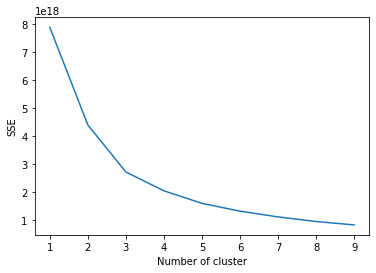

In [62]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Silhouette Scores

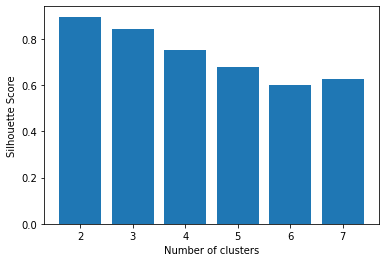

In [63]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [84]:
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                max_iter=1000,n_init=10,random_state=0) 

y_kmeans = kmeans.fit_predict(X)

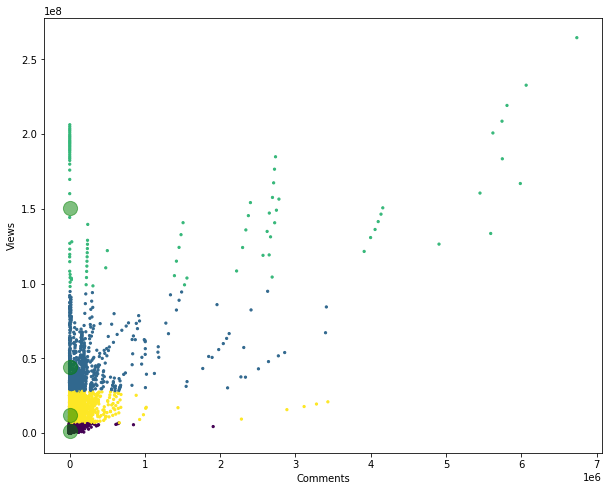

In [90]:
plt.subplots(figsize=(10, 8))
plt.scatter(X['comment_count'].values, 
            X['view_count'].values, c=y_kmeans, s=5, cmap='viridis')

km_centers = kmeans.cluster_centers_

plt.xlabel('Comments')
plt.ylabel('Views')

plt.scatter(km_centers[:, 0], km_centers[:, 1], c='g', s=200, alpha=0.5);

### DBSCAN Clustering


The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

In [28]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 
  
X_principal.head(5)

,P1,P2,P3
0,-0.090860,0.046300,0.504380
1,-0.656592,0.279950,0.233090
2,0.425802,-0.382456,0.560484
3,1.200278,0.136009,-0.322159
4,-0.641465,-0.119412,0.092051


Text(0, 0.5, 'Views')

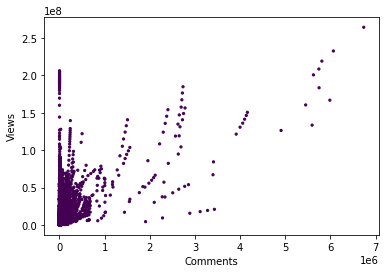

In [93]:
from sklearn.cluster import DBSCAN

# cluster the data into five clusters
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)


# plot the cluster assignments
plt.scatter(X['comment_count'].values, 
            X['view_count'].values, c=clusters, s=5, cmap='viridis')

plt.xlabel("Comments")
plt.ylabel("Views")


### K-Means Conclusion: After performing the K-means clustering it can be deduce that the cluster with green colour shows that videos having more comments have greater watch rate and user interaction 

## Clustering Using Tensorflow

In [94]:
import tensorflow as tf

In [95]:
cluster = X[[ 'comment_count', 'view_count']]

In [96]:
dataPoints = X
dataPoints = dataPoints[['comment_count', 'view_count']].copy()
dataPoints['view_count'] = dataPoints['view_count'].astype(float)

In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X = dataPoints 
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [98]:
print("process starting....")
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
print("process completed")

process starting....
process completed


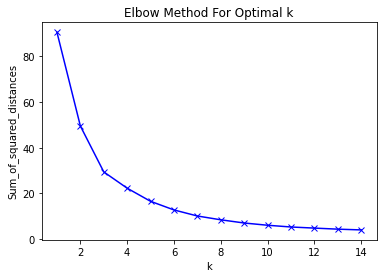

In [99]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [100]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(dataPoints, dtype=tf.float32), num_epochs=1)

In [101]:
# Kmeans via tensorflow

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
 
num_clusters = 3

kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)


# train
num_iterations = 15

previous_centers = None
print("starting process....")
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(dataPoints):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
print("process completed")


starting process....
score: 5.170647e+18
delta: [[-3.8966846e+02 -1.6403509e+05]
 [-9.5149609e+02  5.0705125e+04]
 [ 2.2060062e+04  3.6066765e+06]]
score: 4.310284e+18
delta: [[-1.0801416e+02 -2.4453406e+04]
 [ 2.3863999e+03  5.4806975e+05]
 [ 2.2213453e+04  4.3632865e+06]]
score: 3.6899913e+18
delta: [[4.2885620e+02 1.0476884e+05]
 [3.3049946e+03 7.5042388e+05]
 [2.9605602e+04 5.5424250e+06]]
score: 3.1518614e+18
delta: [[5.8722925e+02 1.4204016e+05]
 [3.9501787e+03 9.5019250e+05]
 [4.1266039e+04 6.9934690e+06]]
score: 2.6638797e+18
delta: [[6.4354834e+02 1.5555719e+05]
 [4.7560518e+03 1.1374082e+06]
 [5.1976016e+04 8.0691860e+06]]
score: 2.2807769e+18
delta: [[6.3985596e+02 1.4704375e+05]
 [5.6366758e+03 1.2449185e+06]
 [4.6596297e+04 7.2584260e+06]]
score: 2.0401471e+18
delta: [[5.8520850e+02 1.2762919e+05]
 [6.0699512e+03 1.2832285e+06]
 [4.0470422e+04 6.4851440e+06]]
score: 1.878313e+18
delta: [[5.0841943e+02 1.1354000e+05]
 [5.7928848e+03 1.3358420e+06]
 [4.5728641e+04 6.0339680e

In [102]:
centers = kmeans.cluster_centers()
centers

array([[7.5195425e+03, 1.6359151e+06],
       [7.8661258e+04, 1.7053458e+07],
       [6.5772619e+05, 8.8766776e+07]], dtype=float32)

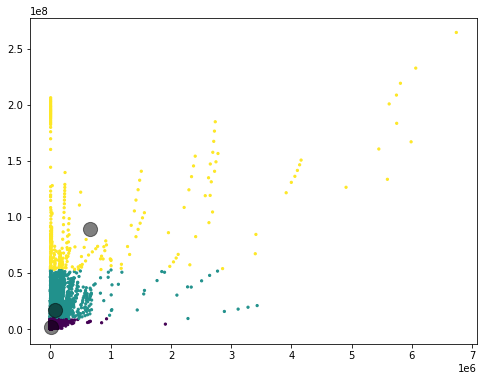

In [103]:
X = dataPoints.to_numpy()
plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_indices, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Conclusion: After performing the K-means clustering it can be deduce that the cluster with yellow color shows that videos having more comments have greater watch rate and user interaction 